In [20]:
# método de euler para resolvers ecuaciones diferenciales
import matplotlib.pyplot as plt 

def euler(fun, t, z0):
    nt = len(t)
    h = t[1] - t[0]
    z = []
    z.append(z0)
    
    for i, t in enumerate(t):
        new_z = z[i] + h*fun(z[i])
        z.append(new_z)
    z.pop()
    return z

def edo_enfriamiento(T):
    dTdt = -0.2*(T-70)
    return dTdt

def resolver():
    t = [0.1*x for x in range(1000)]
    T0 = 35
    T = euler(edo_enfriamiento, t, T0)
    return t, T

def graficar(x, y):
    plt.plot(x, y,"-", label ="Temperatura")
    plt.xlabel("t")
    plt.ylabel("T")
    plt.title("Temperatura de enfriamiento", fontsize = 18)
    plt.legend(loc=4)
    plt.show()


In [16]:
x, y = resolver()
print(len(x), len(y))

1000 1000


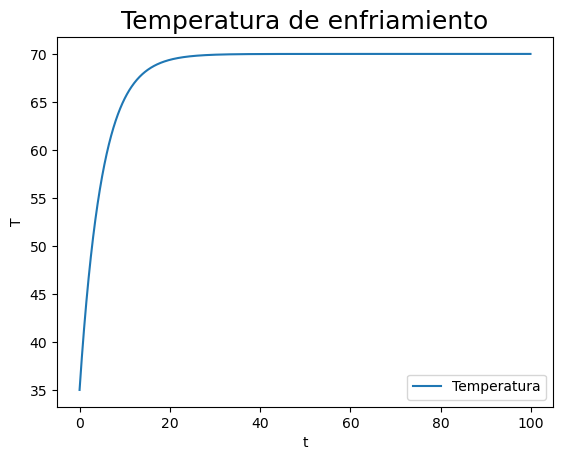

In [21]:
graficar(x,y)

## Ejemplo Reactores en serie

La reacción A -> B toma lugar en dos reactores en serie. Los reactores son de mezcla completa pero no estan en estado estacionario.
Las ecuaciones del balance de masa para componente es mostrado abajo para cada reactor :

$$ \frac{dC_{A1}}{dt} = \frac{1}{\tau}(C_{A0}-C_{A1})-kC_{A1}$$

$$ \frac{C_{B1}}{dt} = -\frac{1}{\tau}C_{B1}+kC_{A1}$$

$$ \frac{dC_{A2}}{dt} = \frac{1}{\tau}(C_{A1}-C_{A2})-kC_{A2}$$

$$ \frac{dC_{B2}}{dt} = \frac{1}{\tau}(C_{b1}-C_{b2})+kC_{A2}$$

$$C_{A0} = 20$$

$$k = 0.12/min$$

$$\tau = 5 min$$

Las demás concentraciones son cero inicialmente. Halle las concentración de A y B en los primeros 10 minutos.

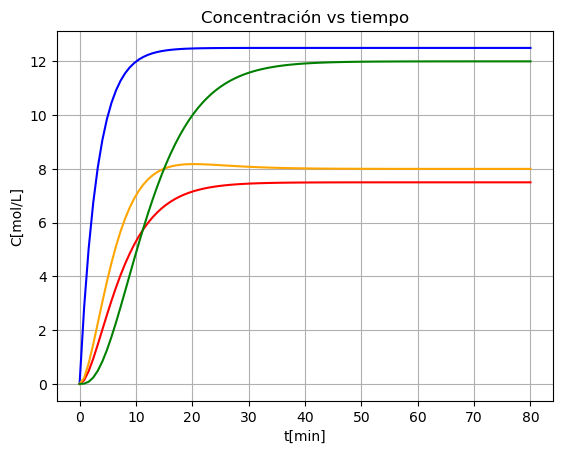

In [24]:
import numpy as np

def rungek4(fun, t, z0):
    nt = len(t)
    nz = len(z0)
    h = t[1]-t[0]
    z = np.zeros((nt, nz))
    z[0] = z0

    for i in range(1, nt):
        m1 = fun(z[i-1])
        m2 = fun(z[i-1]+h*m1/2)
        m3 = fun(z[i-1]+h*m2/2)
        m4 = fun(z[i-1]+h*m3)
        z[i] = z[i-1]+h*(m1+2*m2+2*m3+m4)/6
    return z

def edo_reactores(C):
    ## Definimos constantes
    tau = 5
    k = 0.12
    ca0 = 20
    
    dC = np.zeros(len(C))

    dC[0] = 1/tau*(ca0-C[0])-k*C[0]
    dC[1] = -1/tau*C[1]+k*C[0]
    dC[2] = 1/tau*(C[0]-C[2])-k*C[1]
    dC[3] = 1/tau*(C[1]-C[3])+k*C[1]

    return dC 

t = np.linspace(0, 80, 100)
C0 = np.array([0, 0, 0, 0])

C = rungek4(edo_reactores,t,C0)

fig, ax = plt.subplots()

ax.plot(t, C[:,0] , color = "blue")
ax.plot(t, C[:,1] , color = "red")
ax.plot(t, C[:,2] , color = "orange")
ax.plot(t, C[:,3] , color = "green")

ax.set_title("Concentración vs tiempo")
ax.set_xlabel("t[min]")
ax.set_ylabel("C[mol/L]")
ax.grid()
plt.show()


## Constantes de Antoine para el Benceno

Los datos de presión de vapor del Benceno a diferentes estan dadas en la siguiente tabla. Determine sus correspondientes Contantes de Antoine.

Presión (mmHg) : 381.14, 651.61, 1049.81, 1623.85, 2378.89, 3428.7, 4747.43, 6412.65, 8481.25, 11015.28, 502.67, 837.78, 1313.56, 1975.51, 2870.18, 4033.76, 5537.67, 7384.89, 9670.69, 12411.58
Temperatura (°C) : -56.67, -45.56, -34.44, -23.33, -12.22, -1.11, 10.0, 21.11, 32.22, 43.33, -51.11, -40.0, -28.89, -17.78, -6.67, 4.44, 15.56, 26.67, 37.78, 48.89 

La Ecuación de Antoine tiene la forma:

$$\log_{10} P = A-\frac{B}{T+C}$$

Podemos reordenar nuestra ecuación para hallar las constantes a partir de una regresión multilineal.

$$T \cdot \log_{10}P +C\cdot \log_{10}P =A\cdot T+A\cdot C-B $$

$$ \log_{10}P=A+\frac{A\cdot C-B}{T}-\frac{C\cdot \log_{10}P}{T}$$

Hacemos las constantes iguales a    $b_0=A$ ,    $b_1=A\cdot C-B$ ,    $b_2=-C$ 

y hacemos cambios de variable     $y=\log_{10}P$ ,    $x_1=\frac{1}{T}$,     $x_2=\frac{\log_{10}P}{T}$.

$$y=b_0+b_1 x_1+b_2 x_2$$

Se puede demostrar que las constantes de cualquier regresión multilineal por mínimos cuadrados pueden hallarse a partir de la siguiente relación matricial:

$$ \begin{bmatrix} N \\ X_1 \\ X_2\\ \vdots \\ X_k \end{bmatrix} \times \begin{bmatrix} N^T & X_1^T & X_2^T & \cdots & X_k^T \end{bmatrix}\times \begin{bmatrix} b_0 \\ b_1 \\ b_2 \\ \vdots \\ b_k \end{bmatrix}= \begin{bmatrix} N \\ X_1 \\ X_2\\ \vdots \\ X_k \end{bmatrix} \times \begin{bmatrix} Y^T \end{bmatrix}$$

Donde: \(k \): número de variables, \(n  \): número de datos que se tiene de cada variable. 

Recuerde que el vector o matriz transpuesta de cualquier vector \(X\) es \(X^T\), 

Los vectores en la fórmula son los siguientes vectores fila:

$$ N = \overbrace {(1, 1, ... , 1)}^ {n \hspace{1em}unos} \ $$

$$ X_1=(x_{11}, x_{12}, ... , x_{1n})$$

$$ X_2=(x_{21}, x_{22}, ... , x_{2n})$$

...

$$ X_k=(x_{k1}, x_{k2}, ... , x_{kn})$$

$$ Y=(y_1, y_2, ... , y_n)$$

Podemos simplificar aún más la ecuación \(\ref{matriz1}\), pero se tendría que usar división de matrices o multiplicación matrices inversas no cuadradas (lo cuál sabemos que no se lleva en la universidad), se puede dejar así pero vamos a aprovechar MatLab ya que permite la división de matrices no cuadradas con su operador  de división inversa "\". Así entonces simplificando con inversas de matrices no cuadradas tenemos:

$$ \begin{bmatrix} N^T & X_1^T & X_2^T & \cdots & X_k^T \end{bmatrix}\times \begin{bmatrix} b_0 \\ b_1 \\ b_2 \\ \vdots \\ b_k \end{bmatrix}=  \begin{bmatrix} Y^T \end{bmatrix}$$

 $$  \begin{bmatrix} b_0 \\ b_1 \\ b_2 \\ \vdots \\ b_k \end{bmatrix}= \begin{bmatrix} N^T & X_1^T & X_2^T & \cdots & X_k^T \end{bmatrix} \setminus \begin{bmatrix} Y^T \end{bmatrix}$$


Para determinar el grado de correlación usamos la siguiente fórmula que es conocido como el coeficiente de determinación que es muy usado para verifcar el grado de ajuste en regresiones multilineales.

$$R^2 =\frac{\displaystyle\sum_{i=1}^{n}(\hat{y}_i-\bar{y})}{\displaystyle\sum_{i=1}^{n}(y_i - \bar{y})}$$

PARA ESTE PROBLEMA PARTICULAR 
$y =\log_{10}P$, 

$y_i$ corresponde a logaritmo de cada una de las presiones en nuestros datos, $\bar{y}$ la promedio de los logaritmos de los datos, e $\hat{y}_i$ es el valor que obtenemos al aplicar nuestra fórmula de regresión con los valores $x_{1i}$ y $x_{2i}$.